In [25]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


In [8]:
file_path = "train_test_data.xlsx"
df_target = pd.read_excel(file_path, sheet_name="Sheet4")

df_target.head(3)


,University Name,QS_rank_2025,QS_rank_2024,Location,Location_num,Location Full,Size,Size_num,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,accept_DET?
0,Massachusetts Institute of Technology (MIT),1,1,US,1,United States,M,1,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,1
1,Imperial College London,2,6,UK,2,United Kingdom,L,2,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,1
2,University of Oxford,3,3,UK,2,United Kingdom,L,2,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,1


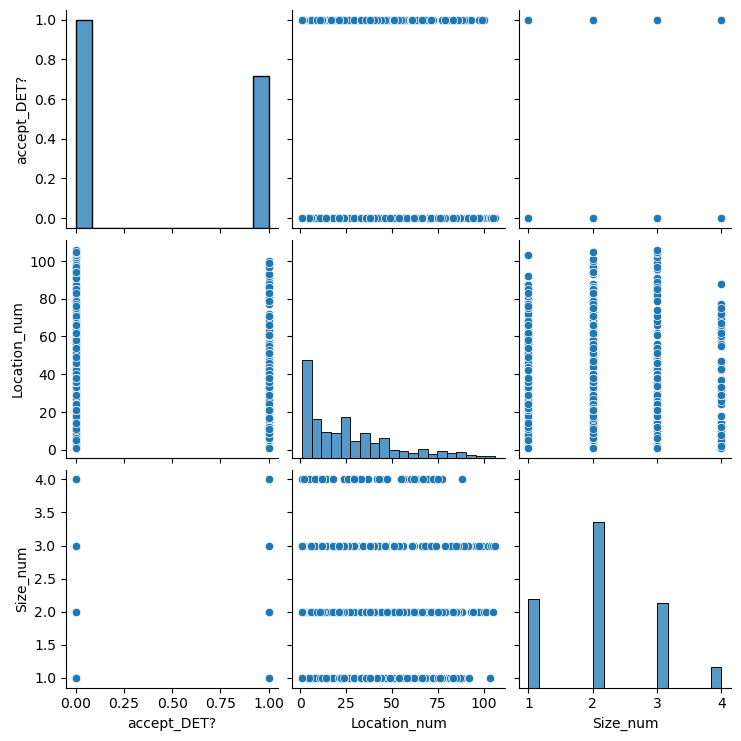

In [9]:
sns.pairplot(df_target[['accept_DET?', 'Location_num', 'Size_num']])

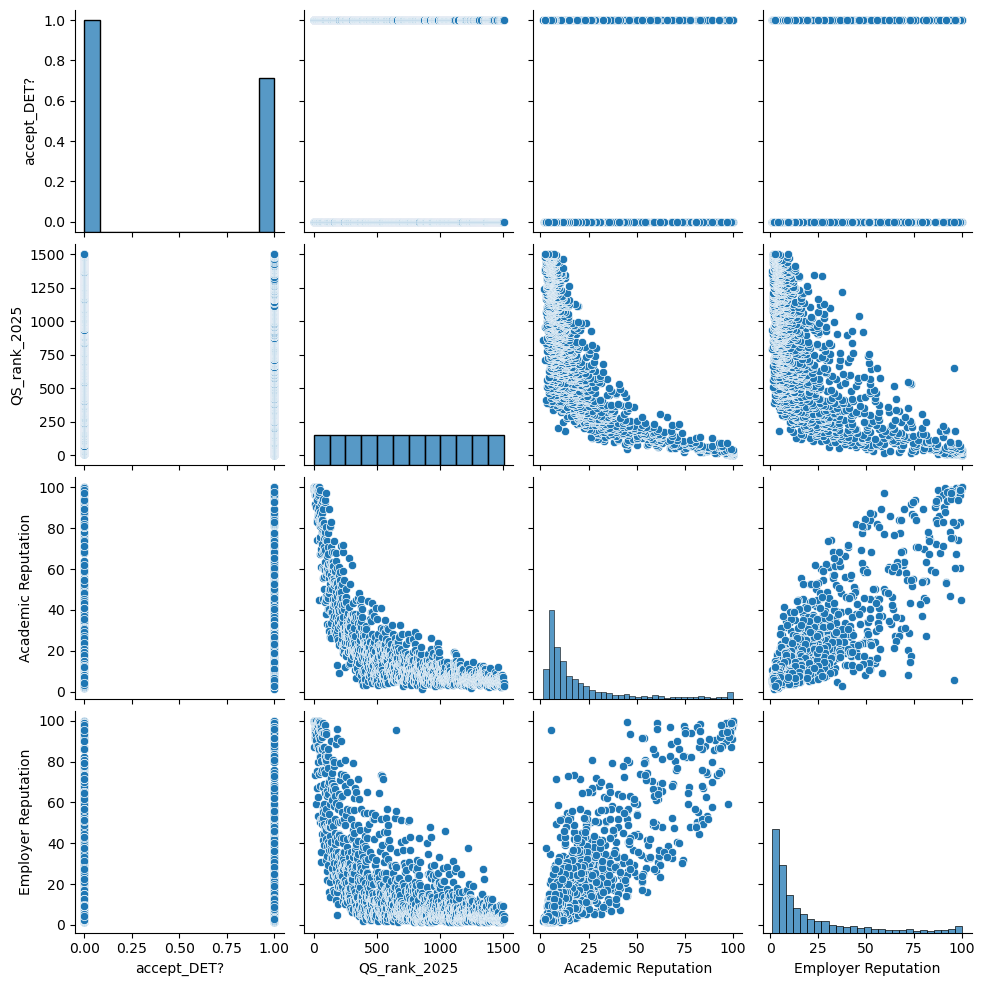

In [11]:
sns.pairplot(df_target[['accept_DET?', 'QS_rank_2025', 'QS_rank_2024', 'Location', 'Size', 'Academic Reputation', 'Employer Reputation']])
# sns.pairplot(df_target[['accept_DET?', 'Location_num', 'Size_num']])
# sns.pairplot(df_target[['accept_DET?', 'QS_rank_2025', 'QS_rank_2024', 'Location_num', 'Size_num', 'Academic Reputation', 'Employer Reputation', 'Faculty Student', 'Citations per Faculty', 
#                         'International Faculty', 'International Students', 'International Research Network', 'Employment Outcomes', 'Sustainability']])

d:\Apps\Anaconda\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


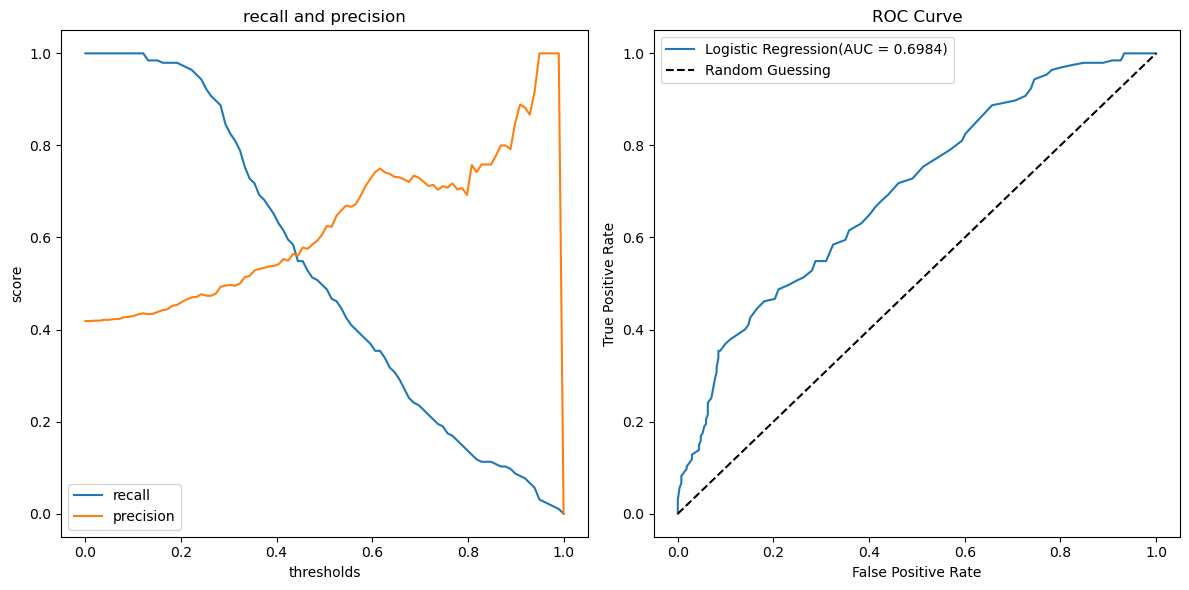

In [39]:
# 直接用随机森林算法进行训练，使用某组默认超参数

# 选择特征。这里没有添加24年的QS排名，需进一步处理后才能添加
features = [
    "QS_rank_2025", 
    "Location_num", 
    "Size_num",
    "Academic Reputation",
    "Employer Reputation",
    "Citations per Faculty",
    "International Students",
    "Employment Outcomes",
    "Sustainability"
]

X = df_target[features].to_numpy()
y = df_target["accept_DET?"].to_numpy()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=42)

# 初始化随机森林模型并设置超参数
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

y_test_proba = rf_model.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 100)
recall_values = []
precision_values = []

for threshold in thresholds:
    y_test_pred = (y_test_proba >= threshold).astype(int)
    recall = recall_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall_values.append(recall)
    precision_values.append(precision)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(thresholds, recall_values, label='recall')
plt.plot(thresholds, precision_values, label='precision')
plt.xlabel('thresholds')
plt.ylabel('score')
plt.title('recall and precision')
plt.legend()

fpr, tpr, _ = roc_curve(y_test, y_test_proba)
auc_value = roc_auc_score(y_test, y_test_proba)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'Logistic Regression(AUC = {auc_value:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
最佳参数： {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


d:\Apps\Anaconda\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Apps\Anaconda\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Apps\Anaconda\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


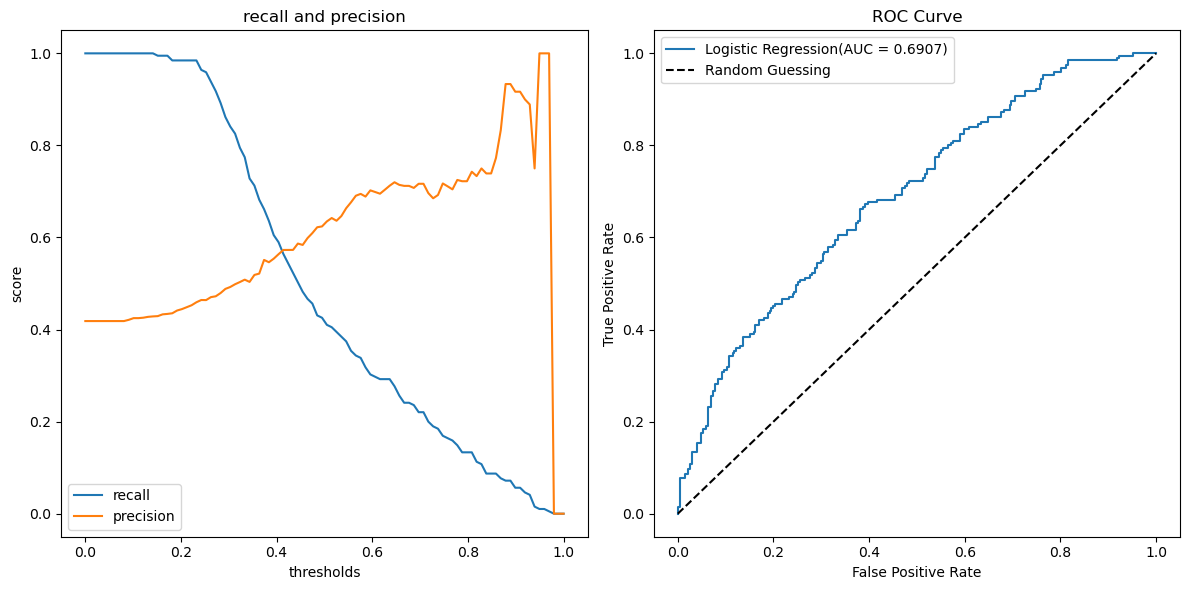

In [40]:
# 用 GridSearchCV 寻找最优参数组合

# 选择特征。这里没有添加24年的QS排名，需进一步处理后才能添加
features = [
    "QS_rank_2025", 
    "Location_num", 
    "Size_num",
    "Academic Reputation",
    "Employer Reputation",
    "Citations per Faculty",
    "International Students",
    "Employment Outcomes",
    "Sustainability"
]

X = df_target[features].to_numpy()
y = df_target["accept_DET?"].to_numpy()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=42)

# 利用参数网络进行参数搜索，寻找最优超参数组合，提高模型表现
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 初始化随机森林模型
rf_model = RandomForestClassifier(random_state=42)

# 用 GridSearchCV 进行参数搜索，用5折交叉验证，评分指标为ROC AUC
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=2)

# 训练模型并找出最佳参数组合
grid_search.fit(X_train, y_train)
print("最佳参数：", grid_search.best_params_)

y_test_proba = grid_search.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0, 1, 100)
recall_values = []
precision_values = []

for threshold in thresholds:
    y_test_pred = (y_test_proba >= threshold).astype(int)
    recall = recall_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall_values.append(recall)
    precision_values.append(precision)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(thresholds, recall_values, label='recall')
plt.plot(thresholds, precision_values, label='precision')
plt.xlabel('thresholds')
plt.ylabel('score')
plt.title('recall and precision')
plt.legend()

fpr, tpr, _ = roc_curve(y_test, y_test_proba)
auc_value = roc_auc_score(y_test, y_test_proba)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f'Logistic Regression(AUC = {auc_value:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()